In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv('../rawdata/dataset_combine.csv')

# Tampilkan 5 baris pertama
df.head()


,Title,FullText,Author,Url,Date,label
0,"Efek Ekor Jas Pencalonan Anies, Elektabilitas ...",Hasil jajak pendapat yang diselenggarakan Litb...,NaN,https://video.kompas.com/watch/258152/efek-eko...,NaN,0.0
1,"Ekonomi 2024 Ditargetkan Tumbuh 5,7 Persen, pa...","JAKARTA, KOMPAS.com - Pemerintah menargetkan p...",Penulis Yohana Artha Uly | Editor Aprillia Ika,http://money.kompas.com/read/2023/02/21/142238...,NaN,0.0
2,"Survei Litbang Kompas: PDI-P, Gerindra, dan Go...","PDI-Perjuangan, Partai Gerindra, dan Partai Go...",NaN,https://video.kompas.com/watch/257988/survei-l...,NaN,0.0
3,"Survei Litbang ""Kompas"": Popularitas Golkar Te...","JAKARTA, KOMPAS.com - Survei Litbang Kompas Ja...",Penulis Tatang Guritno | Editor Bagus Santosa,http://nasional.kompas.com/read/2023/02/21/052...,NaN,0.0
4,"""Endorsement"" dan Basa-basi Politik ala Jokowi...","JAKARTA, KOMPAS.com - Presiden Joko Widodo la...",Penulis Fitria Chusna Farisa | Editor Fitria C...,http://nasional.kompas.com/read/2023/02/21/052...,NaN,0.0


In [2]:
# Ukuran dataset
print(f"Jumlah baris: {df.shape[0]}")
print(f"Jumlah kolom: {df.shape[1]}")

# Tipe data
df.info()

# Statistik deskriptif numerik
df.describe()


Jumlah baris: 33603
Jumlah kolom: 6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33603 entries, 0 to 33602
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Title     33581 non-null  object 
 1   FullText  33474 non-null  object 
 2   Author    33264 non-null  object 
 3   Url       33603 non-null  object 
 4   Date      2245 non-null   object 
 5   label     31356 non-null  float64
dtypes: float64(1), object(5)
memory usage: 1.5+ MB


,label
count,31356.000000
mean,0.331165
std,0.470640
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [3]:
df.isnull().sum()

Title          22
FullText      129
Author        339
Url             0
Date        31358
label        2247
dtype: int64

<Axes: title={'center': 'Distribusi Label Hoaks vs Valid'}, xlabel='label'>

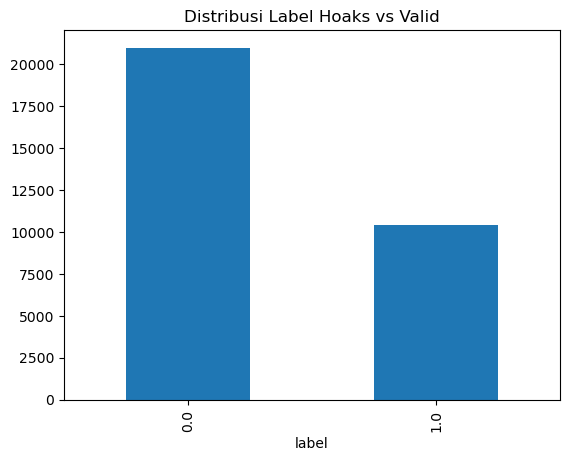

In [5]:
df['label'].value_counts().plot(kind='bar', title='Distribusi Label Hoaks vs Valid')

In [ ]:
df.columns

Index(['Title', 'FullText', 'Author', 'Url', 'Date', 'label'], dtype='object')

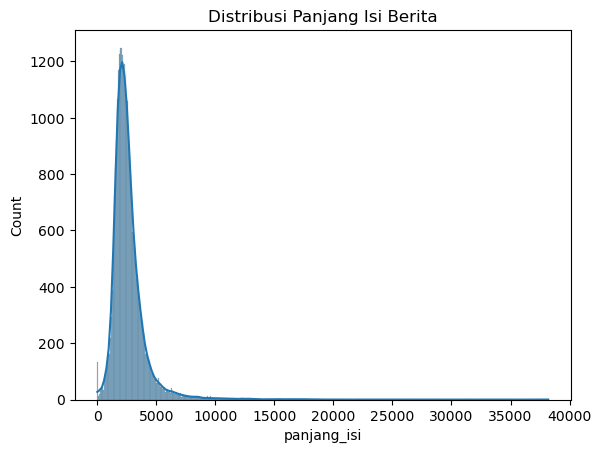

In [10]:
# Tambah kolom panjang isi
df['panjang_isi'] = df['FullText'].astype(str).apply(len)

# Statistik panjang isi
df['panjang_isi'].describe()

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['panjang_isi'], kde=True)
plt.title('Distribusi Panjang Isi Berita')
plt.show()


In [7]:
df.duplicated().sum()

162

In [11]:
from collections import Counter
import re

def bersihkan(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text)
    return text

# Gabungkan semua teks
all_text = ' '.join(df['FullText'].dropna().apply(bersihkan))

# Hitung kata terbanyak
kata_terbanyak = Counter(all_text.split()).most_common(20)
print(kata_terbanyak)


[('yang', 276715), ('dan', 200986), ('di', 200208), ('itu', 107343), ('dengan', 103836), ('ini', 91212), ('dari', 91066), ('dalam', 87316), ('untuk', 86034), ('juga', 84845), ('tidak', 81741), ('pada', 76877), ('tersebut', 64385), ('partai', 63046), ('ada', 53026), ('akan', 52705), ('indonesia', 51181), ('kata', 46738), ('ke', 46353), ('jakarta', 45683)]


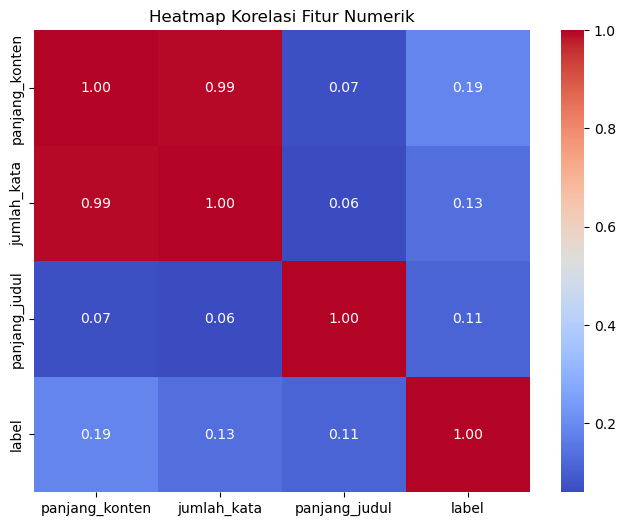

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Ubah nama kolom sesuai struktur dataset kamu
df['panjang_konten'] = df['FullText'].astype(str).apply(len)
df['jumlah_kata'] = df['FullText'].astype(str).apply(lambda x: len(x.split()))
df['panjang_judul'] = df['Title'].astype(str).apply(len)

# Pastikan label berupa angka (misalnya 1 = hoaks, 0 = bukan hoaks)
# Jika sudah numerik, baris ini bisa dilewati
df['label'] = df['label'].astype('category').cat.codes

# Ambil hanya kolom numerik
numerik_df = df[['panjang_konten', 'jumlah_kata', 'panjang_judul', 'label']]

# Hitung korelasi
korelasi = numerik_df.corr()

# Visualisasi dengan heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(korelasi, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi Fitur Numerik')
plt.show()
